<a href="https://colab.research.google.com/github/dafnep4/Dafne-Petrelli-s-coding/blob/main/Coursework_2_neutron_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #importing neccesary libraries which I will be using throughout this analysis.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("pulsar_stars.csv") #importing file I will be using.

In [3]:
df.info() #information of the data set, to understand how many entries and how many feautures it has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
df.head() #printed first few vaues for each feauture to familiarize at which magnitude each feauture is measured in.

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df.describe() #printed main statistics of the data to learn more about it.

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [6]:
df.isnull().sum() #checking if the data contains any null values, in order to drop any missing values if it does contain them.

,0
Mean of the integrated profile,0
Standard deviation of the integrated profile,0
Excess kurtosis of the integrated profile,0
Skewness of the integrated profile,0
Mean of the DM-SNR curve,0
Standard deviation of the DM-SNR curve,0
Excess kurtosis of the DM-SNR curve,0
Skewness of the DM-SNR curve,0
target_class,0


Class Distribution target_class
0    16259
1     1639
Name: count, dtype: int64


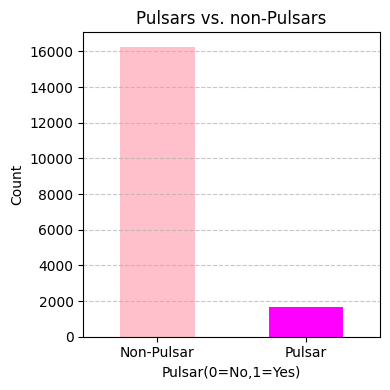


Percentages:
Percentage of Non-Pulsars (0):90.84%
Percentage of Pulsars (1):9.16%


In [44]:
target_col=df["target_class"] #assigning target class feature to a variable.
counts=target_col.value_counts().sort_index()


print("Class Distribution",counts) #printed class distribuition to understand how many pulsars and how non-pulsars the data contained.

plt.figure(figsize=(4, 4)) #plotted the class distribuition.
counts.plot(kind="bar",color=["pink", "magenta"])
plt.xlabel("Pulsar(0=No,1=Yes)")
plt.ylabel("Count")
plt.title("Pulsars vs. non-Pulsars")
plt.xticks(ticks=[0, 1], labels=["Non-Pulsar","Pulsar"],rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

total=counts.sum() #counted the tot. number of pulsars and non-pulsars
non_pulsar=(counts[0]/total)*100 if 0 in counts else 0 #calculated % for both to understand the % disparity between them.
pulsar=(counts[1]/total)*100 if 1 in counts else 0

print("\nPercentages:")
print("Percentage of Non-Pulsars (0):{:.2f}%".format(non_pulsar))
print("Percentage of Pulsars (1):{:.2f}%".format(pulsar))

<Figure size 1400x1200 with 0 Axes>

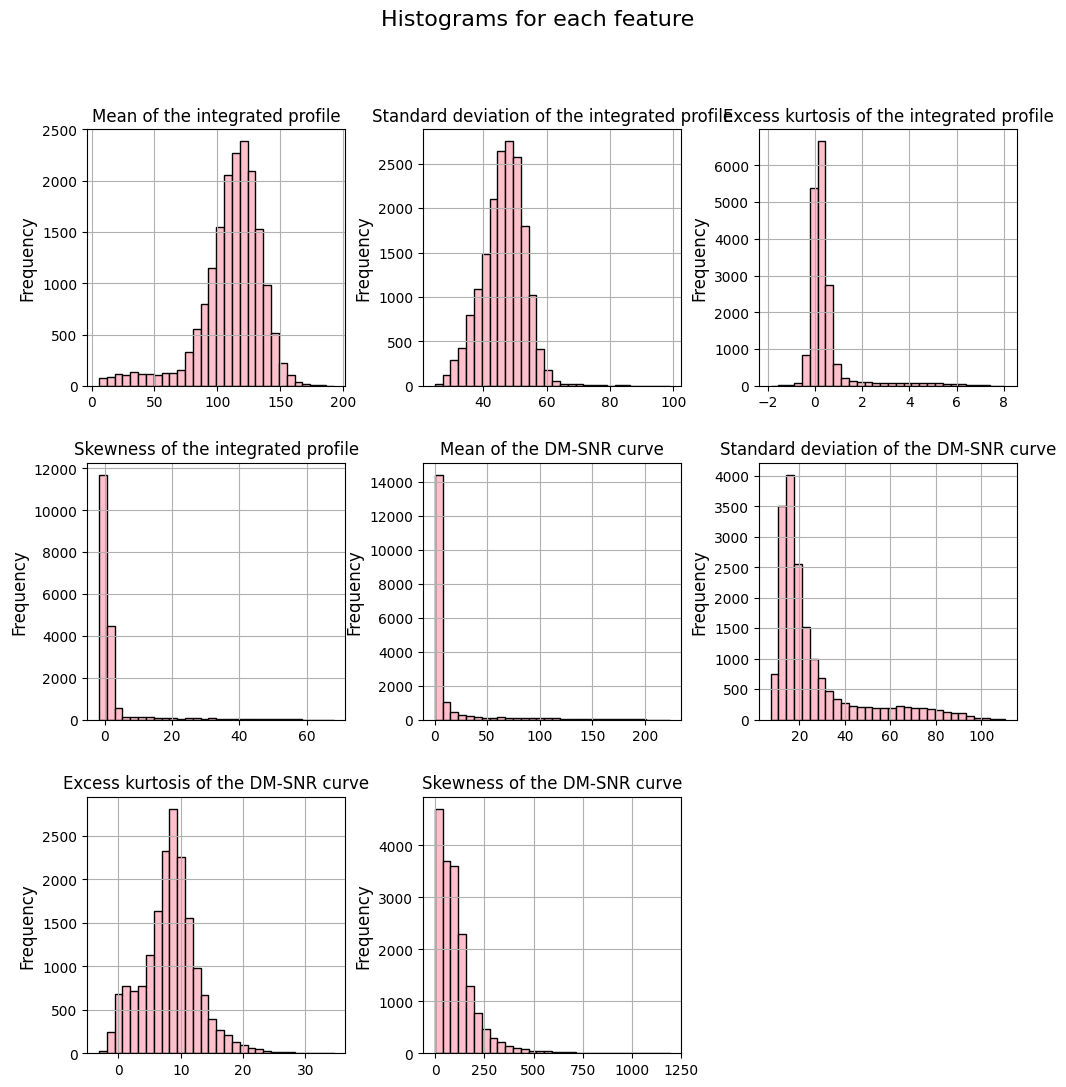

In [45]:
clean_df=df.drop("target_class", axis=1) #dropped target class since it waws plotted before hand.
plt.figure(figsize=(14, 12))
clean_df.hist(bins=30,color='pink',edgecolor='black',figsize=(12, 12)) #printed a histogram for each feauture see distruibtion

plt.suptitle("Histograms for each feature",fontsize=16)

for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.show()

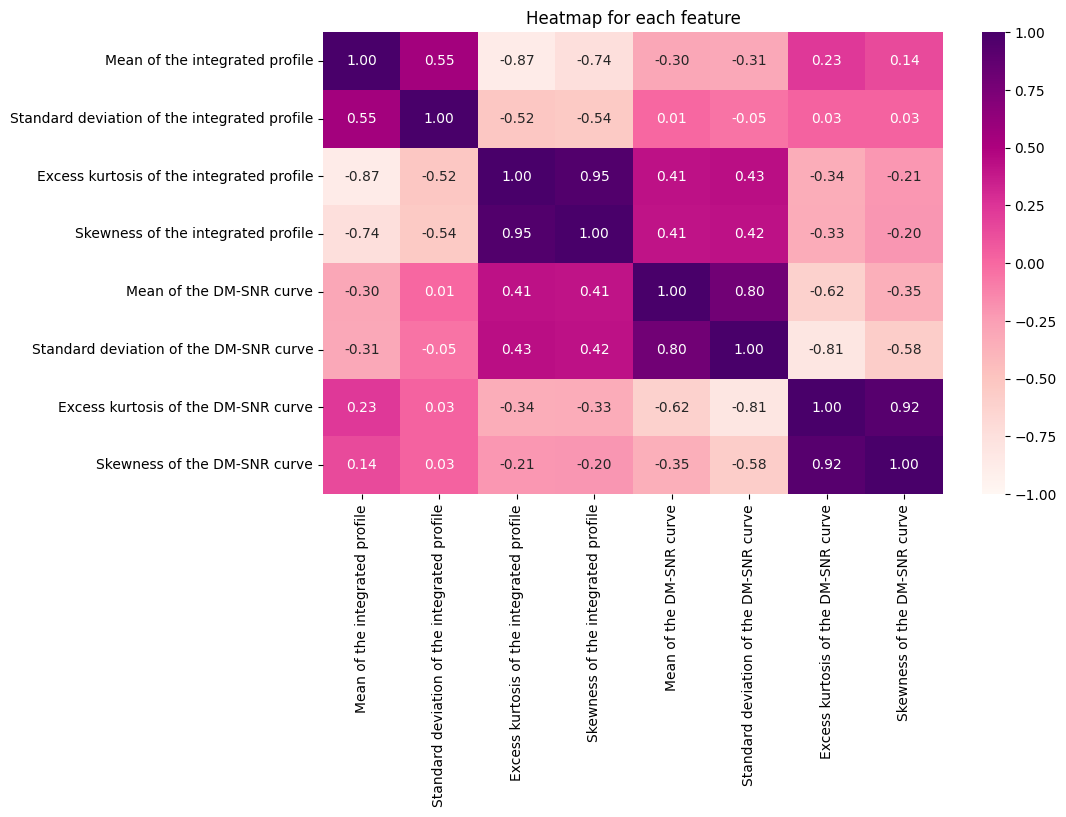

In [48]:
plt.figure(figsize=(10, 6)) #plotted heatmap to see correlation between each feauture
sns.heatmap(clean_df.corr(),annot=True,cmap='RdPu',fmt=".2f",vmin=-1,vmax=1)
plt.title("Heatmap for each feature")
plt.show()

**Naive Bayes**

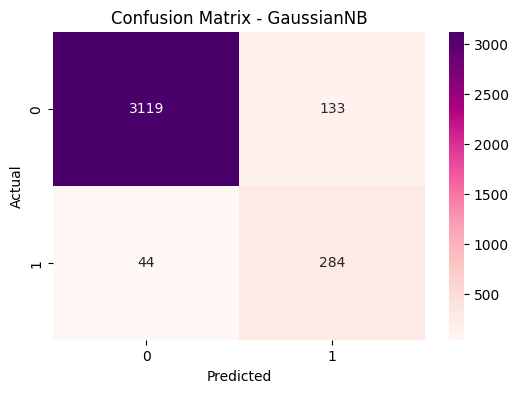


Classification Report - GaussianNB:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3252
           1       0.68      0.87      0.76       328

    accuracy                           0.95      3580
   macro avg       0.83      0.91      0.87      3580
weighted avg       0.96      0.95      0.95      3580

AUC Score - GaussianNB: 0.96


In [50]:
predictors = [
    "Mean of the integrated profile", "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile", "Skewness of the integrated profile",
    "Mean of the DM-SNR curve", "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve", "Skewness of the DM-SNR curve"]
outcome="target_class" #assigned all of the features as the predictors and the target_class as the outcome to perform regression models.

df.columns=df.columns.str.strip()
predictors=[col.strip() for col in predictors] #removes extra space in thr column names that could lead to error in the output.
X=df[predictors] #assigning predictors and outcome to a variable to make the code cleaner.
Y=df[outcome]
X_train_g,X_test_g,y_train_g,y_test_g=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=40) #stratifying the dsata set, to mantain the same test size for both predictors and outcome throughout the whole model, to avoid class imbalance.

gnb=GaussianNB() #performed naive bayes regression.
gnb.fit(X_train_g, y_train_g)
y_pred_g=gnb.predict(X_test_g)
y_prob_g=gnb.predict_proba(X_test_g)[:, 1]

cm_g=confusion_matrix(y_test_g,y_pred_g) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_g,annot=True,fmt='d',cmap='RdPu',xticklabels=[0,1],yticklabels=[0,1]) #created a heatmap for the confusion matrix so it appears clearer.
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report") #computed classification report.
print(classification_report(y_test_g,y_pred_g))

auc_g=roc_auc_score(y_test_g,y_prob_g) #computed naive bayes AUC score.
print(f"AUC score for Naive Bayes: {auc_g:.2f}")


**Linear Discriminant Analysis**

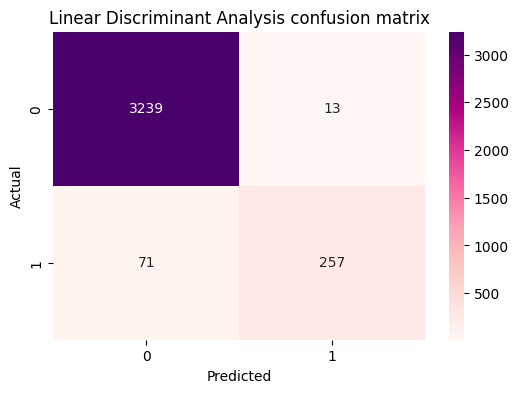


Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.78      0.86       328

    accuracy                           0.98      3580
   macro avg       0.97      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580

AUC score for Linear Discriminant Analysis: 0.98


In [52]:
X_train_lda,X_test_lda,y_train_lda,y_test_lda=train_test_split(X, Y,test_size=0.2,stratify=Y,random_state=40)
lda = LinearDiscriminantAnalysis() #performed linear discriminant analysis regression.
lda.fit(X_train_lda, y_train_lda)
y_pred_lda=lda.predict(X_test_lda)
y_prob_lda=lda.predict_proba(X_test_lda)[:, 1]

cm_lda=confusion_matrix(y_test_lda,y_pred_lda) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda,annot=True,fmt='d',cmap='RdPu',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Linear Discriminant Analysis confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification report") #computed classification report.
print(classification_report(y_test_lda,y_pred_lda))

auc_lda=roc_auc_score(y_test_lda,y_prob_lda) #computed lda AUC score.
print(f"AUC score for Linear Discriminant Analysis: {auc_lda:.2f}")


**Logistic Regression**

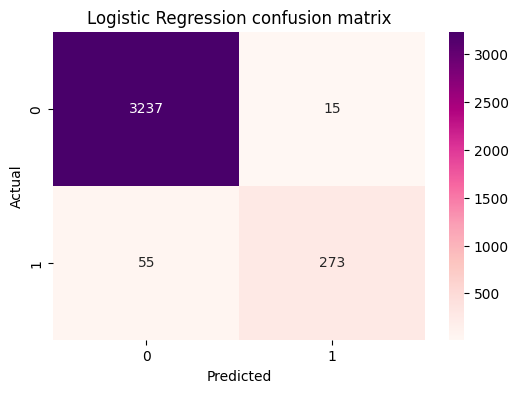


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.83      0.89       328

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580

AUC Score for Logistic Regression: 0.98


In [53]:
X_train_lr,X_test_lr,y_train_lr,y_test_lr=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=40)
lr=LogisticRegression(max_iter=10000) #performed logistic regression regression, by setting max_iter to 10000 it ensures convergence since it is large data set.
lr.fit(X_train_lr,y_train_lr)
y_pred_lr=lr.predict(X_test_lr)
y_prob_lr=lr.predict_proba(X_test_lr)[:, 1]

cm_lr=confusion_matrix(y_test_lr,y_pred_lr) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='RdPu',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Logistic Regression confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report") #computed classification report.
print(classification_report(y_test_lr,y_pred_lr))

auc_lr=roc_auc_score(y_test_lr,y_prob_lr) #computedlogistic regression AUC score.
print(f"AUC Score for Logistic Regression: {auc_lr:.2f}")

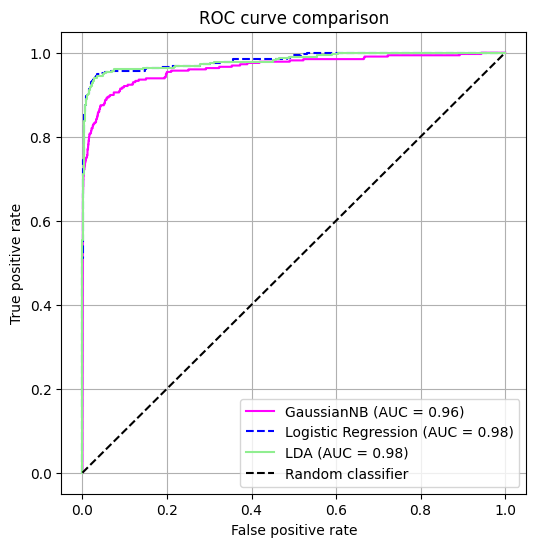

In [64]:
fpr_g,tpr_g,_=roc_curve(y_test_g,y_prob_g) #calculating false positive rate and true positive rate for naive bayes
fpr_lr,tpr_lr,_= roc_curve(y_test_lr,y_prob_lr) #calculating false positive rate and true positive rate for Lineardiscriminant analysis
fpr_lda,tpr_lda,_=roc_curve(y_test_lda,y_prob_lda) #calculating false positive rate and true positive rate for Logistic regression

plt.figure(figsize=(6, 6)) #creating an ROC plot to compare the three different regression models
plt.plot(fpr_g,tpr_g,label=f"GaussianNB (AUC = {auc_g:.2f})",color="magenta")
plt.plot(fpr_lr,tpr_lr,label=f"Logistic Regression (AUC = {auc_lr:.2f})",color="blue",linestyle="--")
plt.plot(fpr_lda,tpr_lda,label=f"LDA (AUC = {auc_lda:.2f})",color="lightgreen")
plt.plot([0, 1],[0, 1],"k--",label="Random classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve comparison")
plt.legend()
plt.grid(True)
plt.show()